# Proyección de datos - MDS
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld
from sklearn import manifold 

# Leer datos

In [2]:
with open('datos.pdd','rb') as f: 
    datos = pk.load(f) 

print(len(datos))
datos.head()

4722740


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,0.0,26.732673,28.712871,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949520,2018-10-30 21:20:23,0.0,25.742574,27.722772,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,0.0,24.752475,26.732673,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,0.0,25.742574,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949524,2018-10-30 21:20:25,0.0,24.752475,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [3]:
with open('datosEstadisticos.pdd','rb') as f: 
    datosEstadisticos = pk.load(f) 

print(len(datosEstadisticos))
datosEstadisticos.head()

4722716


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3949544,2018-10-30 21:20:41,False,0.0,25.108911,28.118812,23.168317,0.0,0.0,0.0,0.0,...,1.309778,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949543,2018-10-30 21:20:41,False,0.0,24.950495,28.039604,23.128713,0.0,0.0,0.0,0.0,...,1.332042,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949545,2018-10-30 21:20:42,False,0.0,24.831683,28.000000,23.128713,0.0,0.0,0.0,0.0,...,1.356351,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949546,2018-10-30 21:20:43,False,0.0,24.752475,28.000000,23.168317,0.0,0.0,0.0,0.0,...,1.356351,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949547,2018-10-30 21:20:44,False,0.0,24.594059,27.960396,23.128713,0.0,0.0,0.0,0.0,...,1.379048,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocesado

### Día del ataque: 

In [4]:
inicio =pd.to_datetime('2018-11-10')
fin = pd.to_datetime('2018-11-11')

datosAtaque = datos.loc[datos['DateTime']>inicio]
datosAtaque = datosAtaque.loc[datosAtaque['DateTime']<fin]

print(len(datosAtaque))
datosAtaque.head()

118136


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
1975678,2018-11-10 00:00:01,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782,0.0,0.0,0.0,0.0,0.0,0.0,False
1975679,2018-11-10 00:00:01,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584,0.0,0.0,0.0,0.0,0.0,0.0,False
1975680,2018-11-10 00:00:01,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584,0.0,0.0,0.0,0.0,0.0,0.0,False
1975681,2018-11-10 00:00:02,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485,0.0,0.0,0.0,0.0,0.0,0.0,False
1975682,2018-11-10 00:00:02,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485,0.0,0.0,0.0,0.0,0.0,0.0,False


In [5]:
datosEstadisticosAtaque = datosEstadisticos.loc[datosEstadisticos['DateTime']>inicio]
datosEstadisticosAtaque = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['DateTime']<fin]

print(len(datosEstadisticosAtaque))
datosEstadisticosAtaque.head()

118136


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
1975678,2018-11-10 00:00:01,False,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,0.0,0.0,...,4.540084,6.456681,6.216108,1.738557,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975679,2018-11-10 00:00:01,False,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,0.0,0.0,...,4.501050,6.230023,5.945268,1.698628,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975680,2018-11-10 00:00:01,False,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,0.0,0.0,...,4.371411,5.943893,5.637771,1.653791,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975681,2018-11-10 00:00:02,False,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,0.0,0.0,...,4.197522,5.645012,5.420585,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975682,2018-11-10 00:00:02,False,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,0.0,0.0,...,4.062222,5.370013,5.233807,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0


### Selección de características:

#### - Datos brutos: 

In [6]:
presiones = datosAtaque.iloc[:,1:13]
presiones.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
1975678,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782,0.0,0.0,0.0,0.0,0.0,0.0
1975679,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584,0.0,0.0,0.0,0.0,0.0,0.0
1975680,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584,0.0,0.0,0.0,0.0,0.0,0.0
1975681,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485,0.0,0.0,0.0,0.0,0.0,0.0
1975682,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
presiones_array = sel.fit_transform(presiones)
presiones_array

array([[ 0.        , 30.69306931, 36.63366337, 46.53465347, 37.62376238,
        17.82178218],
       [ 0.        , 32.67326733, 35.64356436, 42.57425743, 32.67326733,
        15.84158416],
       [ 0.        , 30.69306931, 32.67326733, 40.59405941, 29.7029703 ,
        15.84158416],
       ...,
       [ 5.94059406, 29.7029703 , 23.76237624, 28.71287129, 34.65346535,
        24.75247525],
       [ 5.94059406, 29.7029703 , 24.75247525, 28.71287129, 34.65346535,
        24.75247525],
       [ 5.94059406, 29.7029703 , 24.75247525, 28.71287129, 34.65346535,
        24.75247525]])

In [8]:
presiones = presiones.iloc[:,0:6]
presiones.head()

,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623762,17.821782
1975679,0.000000,32.673267,35.643564,42.574257,32.673267,15.841584
1975680,0.000000,30.693069,32.673267,40.594059,29.702970,15.841584
1975681,5.940594,28.712871,30.693069,38.613861,28.712871,14.851485
1975682,6.930693,28.712871,31.683168,38.613861,29.702970,14.851485


#### - Datos estadísticos: 

In [9]:
presionesEstadisticas = datosEstadisticosAtaque.iloc[:,2:]
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
1975678,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,0.0,0.0,0.0,0.0,...,4.540084,6.456681,6.216108,1.738557,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975679,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,0.0,0.0,0.0,0.0,...,4.501050,6.230023,5.945268,1.698628,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975680,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,0.0,0.0,0.0,0.0,...,4.371411,5.943893,5.637771,1.653791,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975681,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,0.0,0.0,0.0,0.0,...,4.197522,5.645012,5.420585,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0
1975682,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,0.0,0.0,0.0,0.0,...,4.062222,5.370013,5.233807,1.616825,0.0,0.0,0.0,0.0,8.429370e-08,0.0


In [10]:
presionesEstadisticas = pd.concat([presionesEstadisticas.iloc[:,0:6],presionesEstadisticas.iloc[:,12:18]],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,4.118812,30.099010,29.821782,36.514851,28.316832,15.643564,3.809845,2.814971,4.540084,6.456681,6.216108,1.738557
1975679,3.722772,30.178218,30.297030,37.148515,28.871287,15.722772,3.696664,2.859884,4.501050,6.230023,5.945268,1.698628
1975680,3.366337,30.178218,30.613861,37.663366,29.267327,15.801980,3.604015,2.859884,4.371411,5.943893,5.637771,1.653791
1975681,3.287129,30.138614,30.851485,38.059406,29.544554,15.841584,3.520541,2.873562,4.197522,5.645012,5.420585,1.616825
1975682,3.247525,30.099010,31.089109,38.415842,29.821782,15.841584,3.471470,2.886610,4.062222,5.370013,5.233807,1.616825


### Normalizar datos estadísticos: 

In [11]:
presionesMedia =  ld.normalize(presionesEstadisticas.iloc[:,0:6])
presionesDesviacion = ld.normalize(presionesEstadisticas.iloc[:,6:12])

presionesEstadisticas = pd.concat([presionesMedia,presionesDesviacion],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975679,0.065460,0.530641,0.532730,0.653203,0.507660,0.276462,0.170223,0.131691,0.207263,0.286878,0.273766,0.078218
1975680,0.059192,0.530641,0.538301,0.662256,0.514624,0.277855,0.165957,0.131691,0.201294,0.273703,0.259607,0.076153
1975681,0.057799,0.529944,0.542479,0.669220,0.519499,0.278552,0.162113,0.132321,0.193286,0.259940,0.249606,0.074451
1975682,0.057103,0.529248,0.546657,0.675487,0.524373,0.278552,0.159853,0.132922,0.187056,0.247277,0.241005,0.074451


### Filtrar señales: 

### Eliminar precisión: 

In [12]:
presiones = presiones.astype(np.float32)
presionesEstadisticas = presionesEstadisticas.astype(np.float32)

presiones = presiones.astype(np.float64)
presionesEstadisticas = presionesEstadisticas.astype(np.float64)

# Proyección MDS: 

### - Datos brutos: 

In [13]:
#Particionar datos: 
tam_particion = 10

presionesMDS = presiones.iloc[0::tam_particion,:]
print(len(presionesMDS))
presionesMDS.head()

11814


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975689,5.940594,27.722773,30.693069,38.613861,29.702971,14.851485
1975700,5.940594,27.722773,31.683168,42.574257,30.693069,14.851485
1975708,6.930693,33.663368,35.643566,43.564358,28.712872,14.851485
1975718,6.930693,27.722773,30.693069,39.603962,28.712872,14.851485


In [14]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesMDS)

In [15]:
#guardar resultados
with open('mdsDB.pdd','wb') as f:
    pk.dump(mds2D,f)

In [16]:
#cargar datos 
with open('mdsDB.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Datos en bruto')

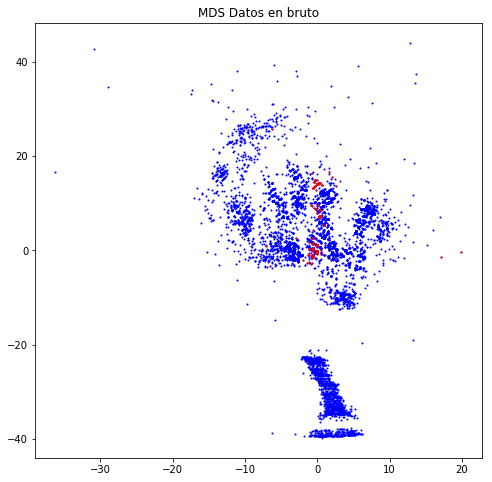

In [17]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Datos en bruto")

### - Datos estadísticos: 

In [13]:
#Particionar datos: 
tam_particion_DE = 10

presionesEstadisticasMDS = presionesEstadisticas.iloc[0::tam_particion_DE,:]
print(len(presionesEstadisticasMDS))
presionesEstadisticasMDS.head()

11814


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975689,0.057799,0.525070,0.559889,0.690808,0.533426,0.274373,0.149320,0.139086,0.154430,0.180803,0.173049,0.057790
1975700,0.078691,0.504875,0.550836,0.705432,0.544568,0.273677,0.134296,0.103632,0.104364,0.158548,0.148039,0.046569
1975708,0.112117,0.509053,0.559889,0.734680,0.555014,0.274373,0.032452,0.096068,0.107472,0.168031,0.149088,0.044203
1975718,0.119081,0.509053,0.566156,0.749304,0.547354,0.270195,0.028472,0.095162,0.099470,0.138337,0.160696,0.045819


In [14]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesEstadisticasMDS)

In [15]:
#guardar resultados
with open('mdsDE.pdd','wb') as f:
    pk.dump(mds2D,f)

In [16]:
#cargar datos 
with open('mdsDE.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Datos en bruto')

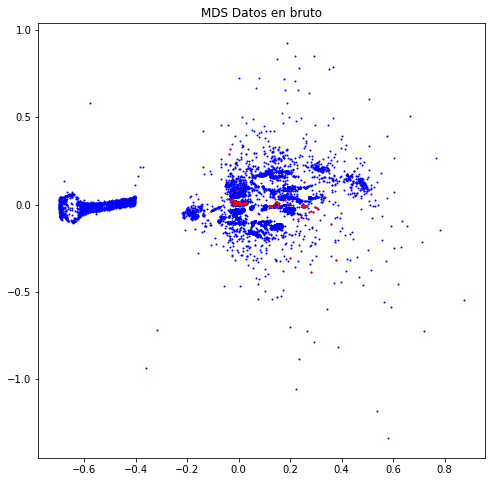

In [17]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_DE]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Datos en bruto")

### - Medias móviles: 

In [28]:
presionesMedia = pd.DataFrame()
for i in range(1,7): 
    nombre = 'P'+str(i)+' mean'
    presionesMedia = pd.concat([presionesMedia, presionesEstadisticas[nombre]], axis=1)
presionesMedia.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070
1975679,0.065460,0.530641,0.532730,0.653203,0.507660,0.276462
1975680,0.059192,0.530641,0.538301,0.662256,0.514624,0.277855
1975681,0.057799,0.529944,0.542479,0.669220,0.519499,0.278552
1975682,0.057103,0.529248,0.546657,0.675487,0.524373,0.278552


In [29]:
#Particionar datos: 
tam_particion_media = 10

presionesMediaMDS = presionesMedia.iloc[0::tam_particion_media,:]
print(len(presionesMediaMDS))
presionesMediaMDS.head()

11814


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070
1975689,0.057799,0.525070,0.559889,0.690808,0.533426,0.274373
1975700,0.078691,0.504875,0.550836,0.705432,0.544568,0.273677
1975708,0.112117,0.509053,0.559889,0.734680,0.555014,0.274373
1975718,0.119081,0.509053,0.566156,0.749304,0.547354,0.270195


In [30]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesMediaMDS)

In [31]:
#guardar resultados
with open('mdsDM.pdd','wb') as f:
    pk.dump(mds2D,f)

In [32]:
#cargar datos 
with open('mdsDM.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Media móvil')

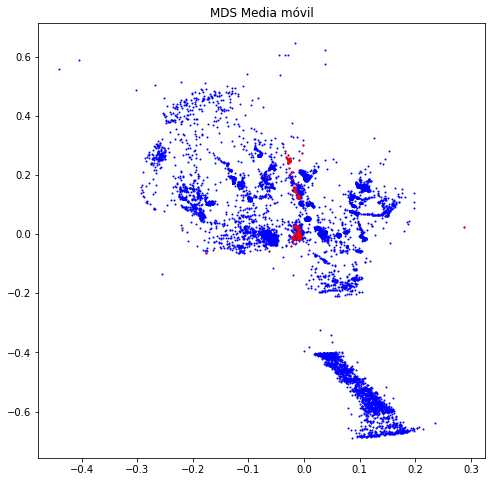

In [33]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_media]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Media móvil")

### - Desviaciones móviles: 

In [38]:
presionesDesviacion = pd.DataFrame()
for i in range(1,7): 
    nombre = 'P'+str(i)+' std'
    presionesDesviacion = pd.concat([presionesDesviacion, presionesEstadisticas[nombre]], axis=1)
presionesDesviacion.head()

,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975679,0.170223,0.131691,0.207263,0.286878,0.273766,0.078218
1975680,0.165957,0.131691,0.201294,0.273703,0.259607,0.076153
1975681,0.162113,0.132321,0.193286,0.259940,0.249606,0.074451
1975682,0.159853,0.132922,0.187056,0.247277,0.241005,0.074451


In [39]:
#Particionar datos: 
tam_particion_desviacion = 10

presionesDesviacionMDS = presionesDesviacion.iloc[0::tam_particion_desviacion,:]
print(len(presionesDesviacionMDS))
presionesDesviacionMDS.head()

11814


,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975689,0.149320,0.139086,0.154430,0.180803,0.173049,0.057790
1975700,0.134296,0.103632,0.104364,0.158548,0.148039,0.046569
1975708,0.032452,0.096068,0.107472,0.168031,0.149088,0.044203
1975718,0.028472,0.095162,0.099470,0.138337,0.160696,0.045819


In [40]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesDesviacionMDS)

In [41]:
#guardar resultados
with open('mdsDD.pdd','wb') as f:
    pk.dump(mds2D,f)

In [42]:
#cargar datos 
with open('mdsDD.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Desviación móvil')

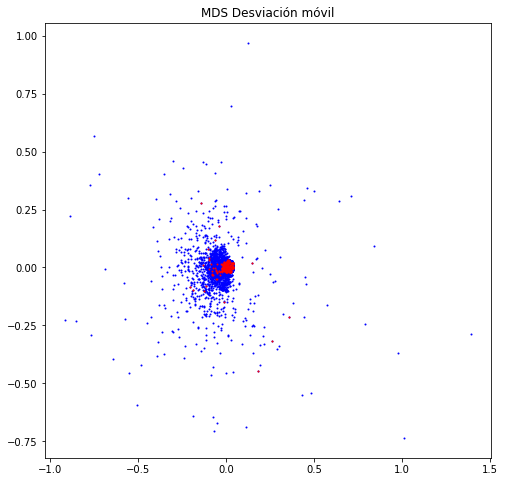

In [43]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_desviacion]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Desviación móvil")

## Antes y después del ataque 

In [4]:
inicio =pd.to_datetime('2018-11-10 3:00:00')
fin = pd.to_datetime('2018-11-10 4:10:00')

datosAtaque = datos.loc[datos['DateTime']>inicio]
datosAtaque = datosAtaque.loc[datosAtaque['DateTime']<fin]

print(len(datosAtaque))
datosAtaque.head()

10495


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
2002671,2018-11-10 03:00:01,6.930693,30.693069,22.772277,25.742574,25.742574,17.821782,0.0,0.0,0.0,0.0,0.0,0.0,False
2002672,2018-11-10 03:00:01,6.930693,29.702970,22.772277,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002673,2018-11-10 03:00:01,6.930693,30.693069,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002674,2018-11-10 03:00:02,6.930693,29.702970,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002675,2018-11-10 03:00:02,6.930693,30.693069,22.772277,25.742574,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False


In [5]:
datosEstadisticosAtaque = datosEstadisticos.loc[datosEstadisticos['DateTime']>inicio]
datosEstadisticosAtaque = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['DateTime']<fin]

print(len(datosEstadisticosAtaque))
datosEstadisticosAtaque.head()

10495


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
2002671,2018-11-10 03:00:01,False,7.049505,30.732673,22.257426,26.613861,26.257426,18.653465,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002672,2018-11-10 03:00:01,False,7.049505,30.693069,22.297030,26.613861,26.217822,18.653465,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002673,2018-11-10 03:00:01,False,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002674,2018-11-10 03:00:02,False,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002675,2018-11-10 03:00:02,False,7.009901,30.693069,22.297030,26.534653,26.138614,18.613861,0.0,0.0,...,0.580145,0.571634,0.639106,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0


In [6]:
presiones = datosAtaque.iloc[:,1:13]
presiones.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
2002671,6.930693,30.693069,22.772277,25.742574,25.742574,17.821782,0.0,0.0,0.0,0.0,0.0,0.0
2002672,6.930693,29.702970,22.772277,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0
2002673,6.930693,30.693069,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0
2002674,6.930693,29.702970,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0
2002675,6.930693,30.693069,22.772277,25.742574,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
presiones = presiones.iloc[:,0:6]
presiones.head()

,P1,P2,P3,P4,P5,P6
2002671,6.930693,30.693069,22.772277,25.742574,25.742574,17.821782
2002672,6.930693,29.702970,22.772277,26.732673,25.742574,18.811881
2002673,6.930693,30.693069,21.782178,26.732673,25.742574,18.811881
2002674,6.930693,29.702970,21.782178,26.732673,25.742574,18.811881
2002675,6.930693,30.693069,22.772277,25.742574,25.742574,18.811881


In [8]:
presionesEstadisticas = datosEstadisticosAtaque.iloc[:,2:]
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
2002671,7.049505,30.732673,22.257426,26.613861,26.257426,18.653465,0.0,0.0,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002672,7.049505,30.693069,22.297030,26.613861,26.217822,18.653465,0.0,0.0,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002673,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002674,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002675,7.009901,30.693069,22.297030,26.534653,26.138614,18.613861,0.0,0.0,0.0,0.0,...,0.580145,0.571634,0.639106,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0


In [9]:
presionesEstadisticas = pd.concat([presionesEstadisticas.iloc[:,0:6],presionesEstadisticas.iloc[:,12:18]],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
2002671,7.049505,30.732673,22.257426,26.613861,26.257426,18.653465,0.328379,0.347711,0.580145,0.594059,0.646730,0.548292
2002672,7.049505,30.693069,22.297030,26.613861,26.217822,18.653465,0.328379,0.404206,0.580145,0.594059,0.646730,0.548292
2002673,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.274146,0.404206,0.580145,0.548292,0.644199,0.495050
2002674,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.274146,0.404206,0.580145,0.548292,0.644199,0.495050
2002675,7.009901,30.693069,22.297030,26.534653,26.138614,18.613861,0.274146,0.404206,0.580145,0.571634,0.639106,0.495050


In [10]:
presionesMedia =  ld.normalize(presionesEstadisticas.iloc[:,0:6])
presionesDesviacion = ld.normalize(presionesEstadisticas.iloc[:,6:12])

presionesEstadisticas = pd.concat([presionesMedia,presionesDesviacion],axis=1)
presionesEstadisticas.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
2002671,0.164358,0.716528,0.518929,0.620499,0.612188,0.434903,0.041342,0.043776,0.073038,0.074790,0.081421,0.069028
2002672,0.164358,0.715605,0.519852,0.620499,0.611265,0.434903,0.041342,0.050888,0.073038,0.074790,0.081421,0.069028
2002673,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002674,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002675,0.163435,0.715605,0.519852,0.618652,0.609418,0.433980,0.034514,0.050888,0.073038,0.071967,0.080461,0.062325


In [11]:
presiones = presiones.astype(np.float32)
presionesEstadisticas = presionesEstadisticas.astype(np.float32)

presiones = presiones.astype(np.float64)
presionesEstadisticas = presionesEstadisticas.astype(np.float64)

### - Datos brutos: 

In [12]:
#Particionar datos: 
tam_particion = 1

presionesMDS = presiones.iloc[0::tam_particion,:]
print(len(presionesMDS))
presionesMDS.head()

10495


,P1,P2,P3,P4,P5,P6
2002671,6.930693,30.693069,22.772278,25.742575,25.742575,17.821783
2002672,6.930693,29.702971,22.772278,26.732674,25.742575,18.811882
2002673,6.930693,30.693069,21.782179,26.732674,25.742575,18.811882
2002674,6.930693,29.702971,21.782179,26.732674,25.742575,18.811882
2002675,6.930693,30.693069,22.772278,25.742575,25.742575,18.811882


In [13]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesMDS)

In [14]:
#guardar resultados
with open('mdsDB2.pdd','wb') as f:
    pk.dump(mds2D,f)

In [15]:
#cargar datos 
with open('mdsDB2.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Datos en bruto')

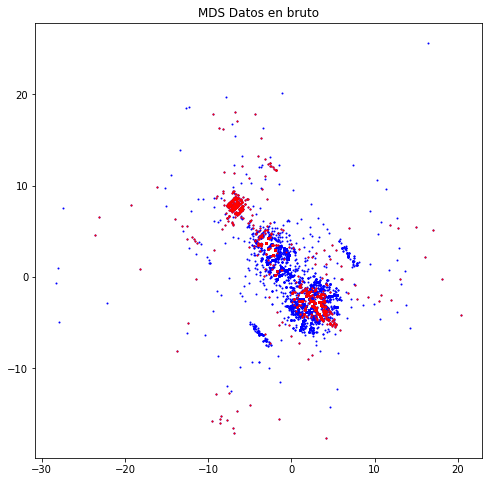

In [16]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Datos en bruto")

### - Datos estadísticos: 

In [22]:
#Particionar datos: 
tam_particion_DE = 1

presionesEstadisticasMDS = presionesEstadisticas.iloc[0::tam_particion_DE,:]
print(len(presionesEstadisticasMDS))
presionesEstadisticasMDS.head()

10495


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
2002671,0.164358,0.716528,0.518929,0.620499,0.612188,0.434903,0.041342,0.043776,0.073038,0.074790,0.081421,0.069028
2002672,0.164358,0.715605,0.519852,0.620499,0.611265,0.434903,0.041342,0.050888,0.073038,0.074790,0.081421,0.069028
2002673,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002674,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002675,0.163435,0.715605,0.519852,0.618652,0.609418,0.433980,0.034514,0.050888,0.073038,0.071967,0.080461,0.062325


In [23]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesEstadisticasMDS)

In [24]:
#guardar resultados
with open('mdsDE2.pdd','wb') as f:
    pk.dump(mds2D,f)

In [39]:
#cargar datos 
with open('mdsDE2.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Datos estadisticos')

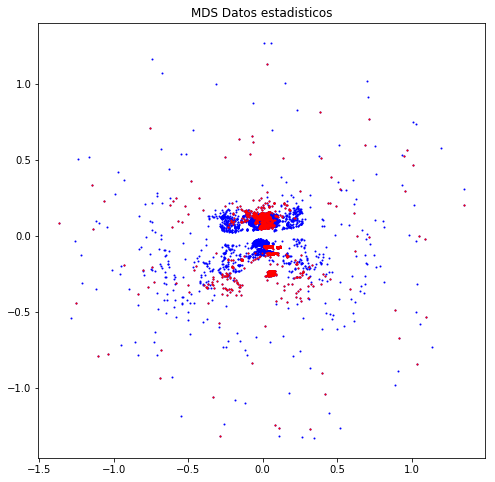

In [40]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_DE]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Datos estadisticos")

### - Media móvil: 

In [33]:
presionesMedia = pd.DataFrame()
for i in range(1,7): 
    nombre = 'P'+str(i)+' mean'
    presionesMedia = pd.concat([presionesMedia, presionesEstadisticas[nombre]], axis=1)
presionesMedia.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean
2002671,0.164358,0.716528,0.518929,0.620499,0.612188,0.434903
2002672,0.164358,0.715605,0.519852,0.620499,0.611265,0.434903
2002673,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980
2002674,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980
2002675,0.163435,0.715605,0.519852,0.618652,0.609418,0.433980


In [34]:
#Particionar datos: 
tam_particion_media = 1

presionesMediaMDS = presionesMedia.iloc[0::tam_particion_media,:]
print(len(presionesMediaMDS))
presionesMediaMDS.head()

10495


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean
2002671,0.164358,0.716528,0.518929,0.620499,0.612188,0.434903
2002672,0.164358,0.715605,0.519852,0.620499,0.611265,0.434903
2002673,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980
2002674,0.163435,0.715605,0.518929,0.619575,0.610342,0.433980
2002675,0.163435,0.715605,0.519852,0.618652,0.609418,0.433980


In [35]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesMediaMDS)

In [36]:
#guardar resultados
with open('mdsDM2.pdd','wb') as f:
    pk.dump(mds2D,f)

In [37]:
#cargar datos 
with open('mdsDM2.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Media móvil')

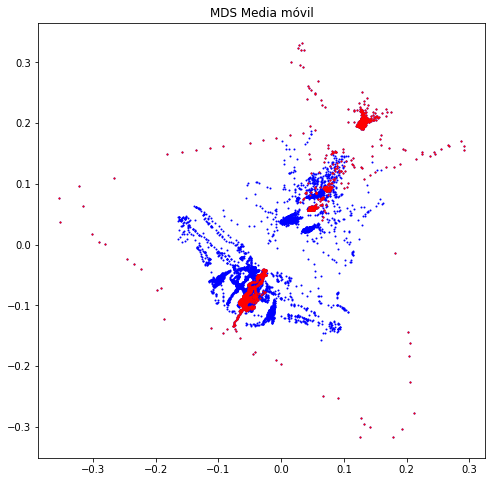

In [38]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_media]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Media móvil")

### - Desviación móvil: 

In [27]:
presionesDesviacion = pd.DataFrame()
for i in range(1,7): 
    nombre = 'P'+str(i)+' std'
    presionesDesviacion = pd.concat([presionesDesviacion, presionesEstadisticas[nombre]], axis=1)
presionesDesviacion.head()

,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
2002671,0.041342,0.043776,0.073038,0.074790,0.081421,0.069028
2002672,0.041342,0.050888,0.073038,0.074790,0.081421,0.069028
2002673,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002674,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002675,0.034514,0.050888,0.073038,0.071967,0.080461,0.062325


In [28]:
#Particionar datos: 
tam_particion_desviacion = 1

presionesDesviacionMDS = presionesDesviacion.iloc[0::tam_particion_desviacion,:]
print(len(presionesDesviacionMDS))
presionesDesviacionMDS.head()

10495


,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
2002671,0.041342,0.043776,0.073038,0.074790,0.081421,0.069028
2002672,0.041342,0.050888,0.073038,0.074790,0.081421,0.069028
2002673,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002674,0.034514,0.050888,0.073038,0.069028,0.081102,0.062325
2002675,0.034514,0.050888,0.073038,0.071967,0.080461,0.062325


In [29]:
mds = manifold.MDS(n_components=2, max_iter=100)
mds2D = mds.fit_transform(presionesDesviacionMDS)

In [30]:
#guardar resultados
with open('mdsDD2.pdd','wb') as f:
    pk.dump(mds2D,f)

In [31]:
#cargar datos 
with open('mdsDD2.pdd','rb') as f: 
    mds2D = pk.load(f) 

Text(0.5, 1.0, 'MDS Desviación móvil')

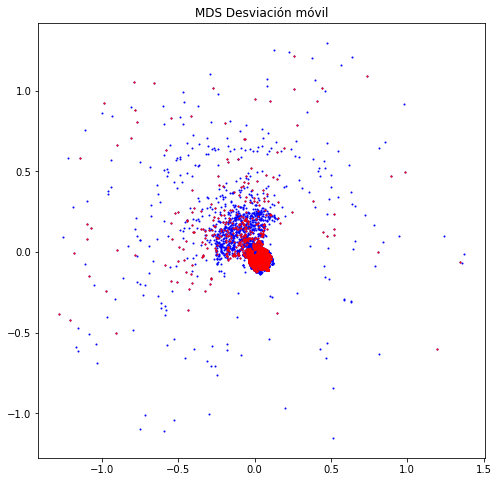

In [32]:
plt.figure(figsize=(8,8))

x = mds2D[:,0]
y = mds2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_desviacion]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mds2D[i,0], mds2D[i,1], s=1, c='r')
plt.title("MDS Desviación móvil")